# Solutions of the exercises on matplotlib

1. **Subplots with Shared Axis**:

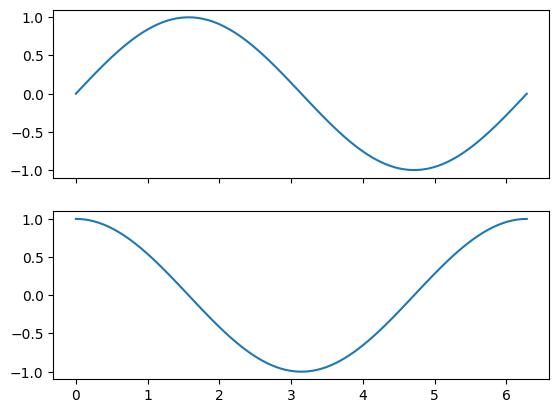

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(x, np.sin(x))
axs[1].plot(x, np.cos(x))
plt.show()

2. **Twin Axes**:


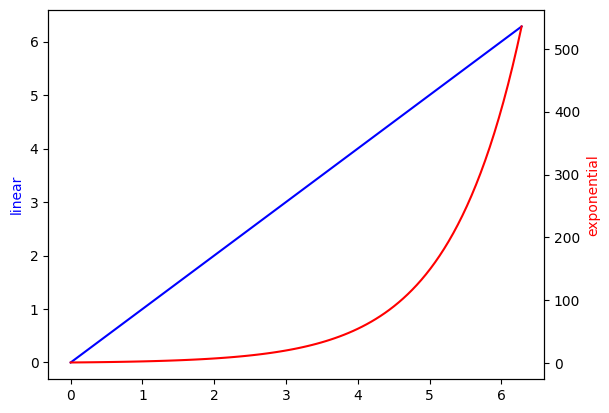

In [2]:
fig, ax1 = plt.subplots()
x = np.linspace(0, 2 * np.pi, 100)
ax1.plot(x, x, 'b-')
ax1.set_ylabel('linear', color='b')
ax2 = ax1.twinx()
ax2.plot(x, np.exp(x), 'r-')
ax2.set_ylabel('exponential', color='r')
plt.show()

3. **Inset Plot**:


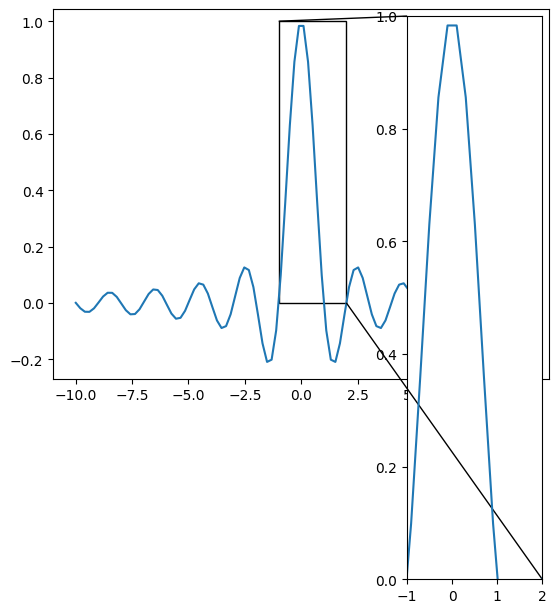

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(-10, 10, 100)
ax.plot(x, np.sinc(x))

axins = zoomed_inset_axes(ax, 2, loc=1)  # zoom-level: 2
axins.plot(x, np.sinc(x))
x1, x2, y1, y2 = -1, 2, 0, 1  # specify the limits
axins.set_xlim(x1, x2)  # apply the x-limits
axins.set_ylim(y1, y2)  # apply the y-limits
mark_inset(ax, axins, loc1=2, loc2=4)
plt.show()

4. **Streamplot**:

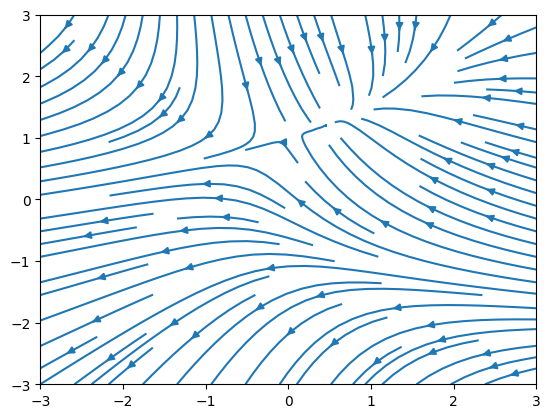

In [4]:
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
plt.streamplot(X, Y, U, V)
plt.show()

5. **Image Display**:


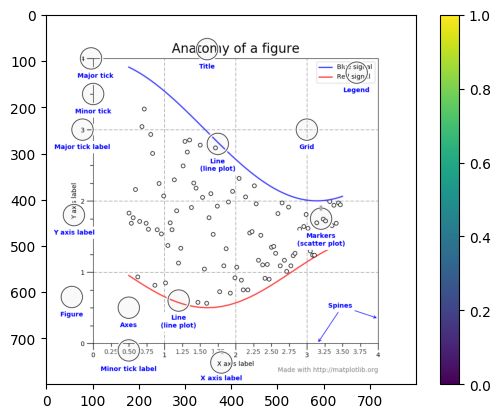

In [5]:
import matplotlib.image as mpimg

img = mpimg.imread('../images/anatomy.png')
imgplot = plt.imshow(img)
plt.colorbar()
plt.show()

6. **Custom Legend**:


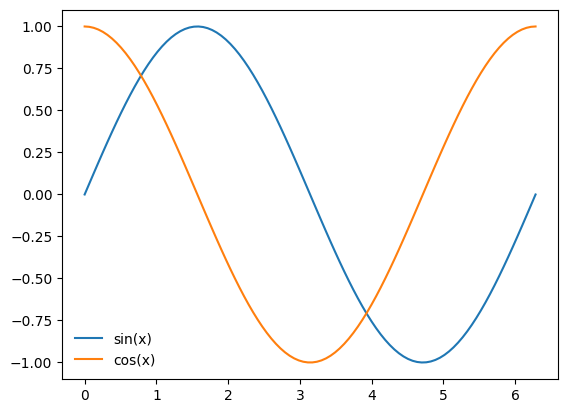

In [6]:
x = np.linspace(0, 2 * np.pi, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.legend(loc='lower left', frameon=False)
plt.show()

7. **Error Bars**:

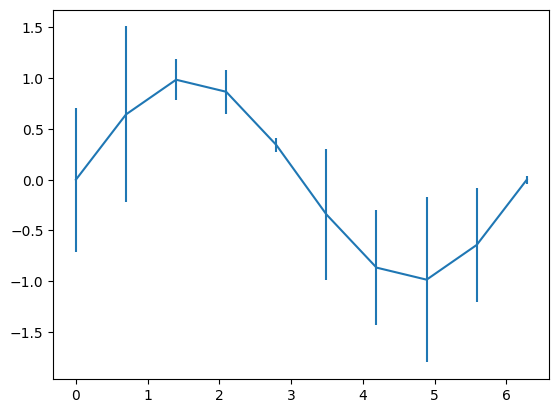

In [7]:
import random 

x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x)
yerr = [random.uniform(0, 1) for _ in range(10)]
plt.errorbar(x, y, yerr=yerr)
plt.show()

8. **Filled Plots**:


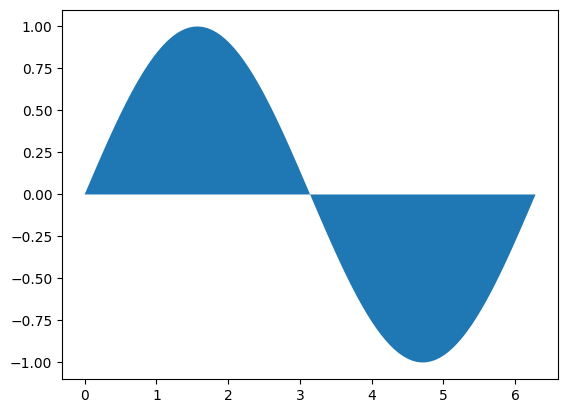

In [8]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plt.fill_between(x, y, 0)
plt.show()

9. **Histogram with Fit**:


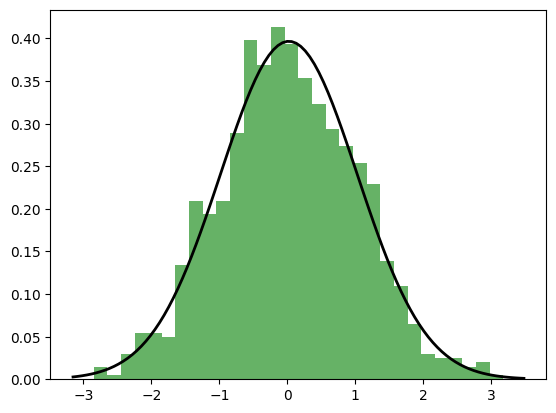

In [9]:
from scipy.stats import norm

data = np.random.randn(1000)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(data), np.std(data))
plt.plot(x, p, 'k', linewidth=2)
plt.show()

10. **Stacked Area Plot**:


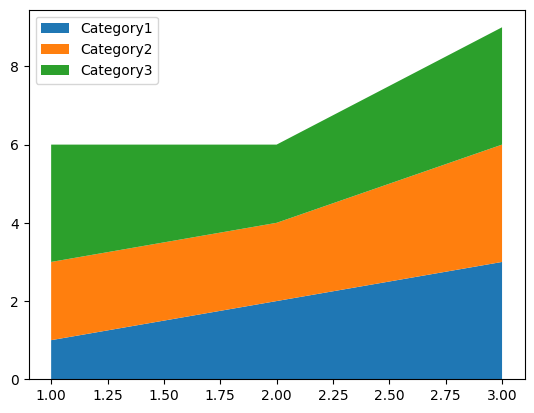

In [10]:
x = np.arange(1, 4)
y1 = np.array([1, 2, 3])
y2 = np.array([2, 2, 3])
y3 = np.array([3, 2, 3])

labels = ["Category1", "Category2", "Category3"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

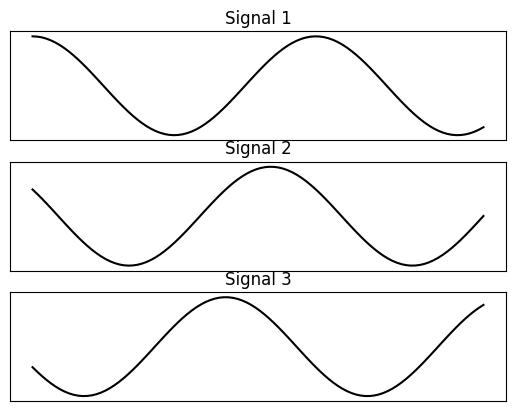

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

fig, axes = plt.subplots(nrows=3)

for ax, y, name in zip(axes, [y1, y2, y3], names):
    ax.plot(x, y, color='black')
    ax.set(xticks=[], yticks=[], title=name)

plt.show()

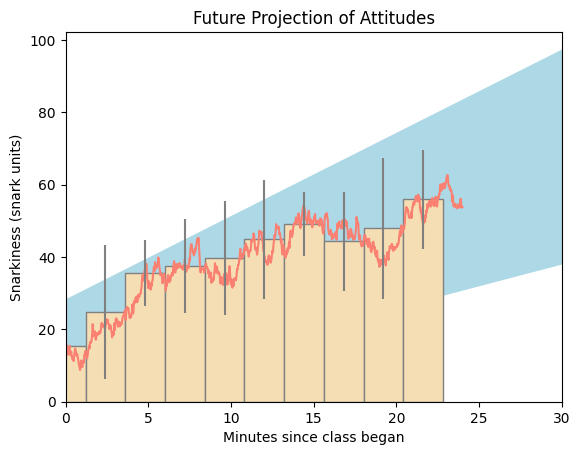

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate data...
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples...
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

fig, ax = plt.subplots()

ax.plot(x_raw, y_raw, color=linecolor)

ax.fill_between(x_pred, y_min_pred, y_max_pred, color=fillcolor)
ax.bar(x_pos, y_avg, width=bar_width, color=barcolor, yerr=y_err, 
       ecolor='gray', edgecolor='gray')

ax.set(title='Future Projection of Attitudes', 
       ylabel='Snarkiness (snark units)', 
       xlabel='Minutes since class began')
ax.set_xlim(0,30)

plt.show()

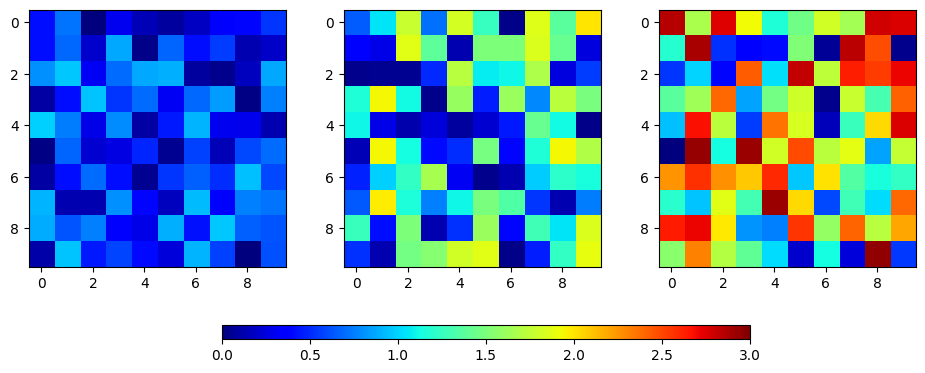

In [13]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate random data with different ranges...
data1 = np.random.random((10, 10))
data2 = 2 * np.random.random((10, 10))
data3 = 3 * np.random.random((10, 10))

# Set up our figure and axes...
fig, axes = plt.subplots(ncols=3, figsize=plt.figaspect(0.5))
fig.tight_layout() # Make the subplots fill up the figure a bit more...
cax = fig.add_axes([0.25, 0.1, 0.55, 0.03]) # Add an axes for the colorbar

# Now you're on your own!
for ax, data in zip(axes, [data1, data2, data3]):
    im = ax.imshow(data, vmin=0, vmax=3, interpolation='nearest', cmap='jet')

fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

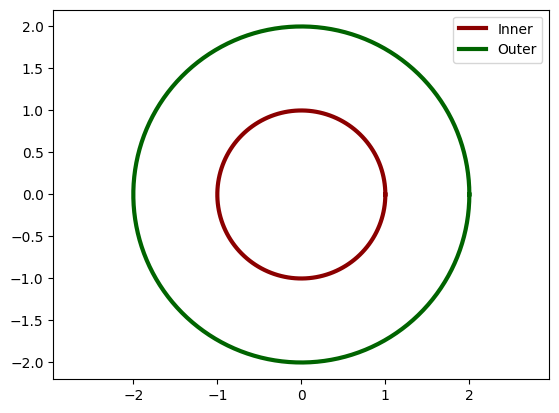

In [14]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2 * np.pi, 150)
x1, y1 = np.cos(t), np.sin(t)
x2, y2 = 2 * x1, 2 * y1

colors = ['darkred', 'darkgreen']

fig, ax = plt.subplots()
ax.plot(x1, y1, color=colors[0], label='Inner', linewidth=3)
ax.plot(x2, y2, color=colors[1], label='Outer', linewidth=3)
ax.legend()

ax.axis('equal')
ax.margins(0.05)

plt.show()

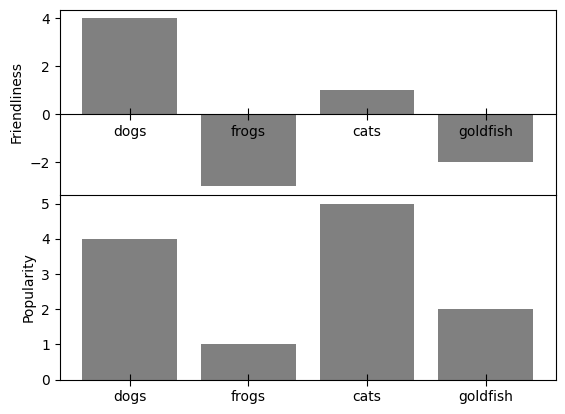

In [15]:
import matplotlib.pyplot as plt
import numpy as np

data = [('dogs', 4, 4), ('frogs', -3, 1), ('cats', 1, 5), ('goldfish', -2, 2)]
animals, friendliness, popularity = zip(*data)


def plot_and_setup_spines(ax, animals, y, ylabel):
    x = np.arange(len(animals))
    ax.bar(x, y, align='center', color='gray')
    ax.set(xticks=x, xticklabels=animals, ylabel=ylabel)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['bottom'].set_position(('data', 0))
    ax.tick_params(axis='x', direction='inout', length=8)
    ax.margins(0.05)

fig, axes = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.0)

plot_and_setup_spines(axes[0], animals, friendliness, 'Friendliness')
plot_and_setup_spines(axes[1], animals, popularity, 'Popularity')

plt.show()

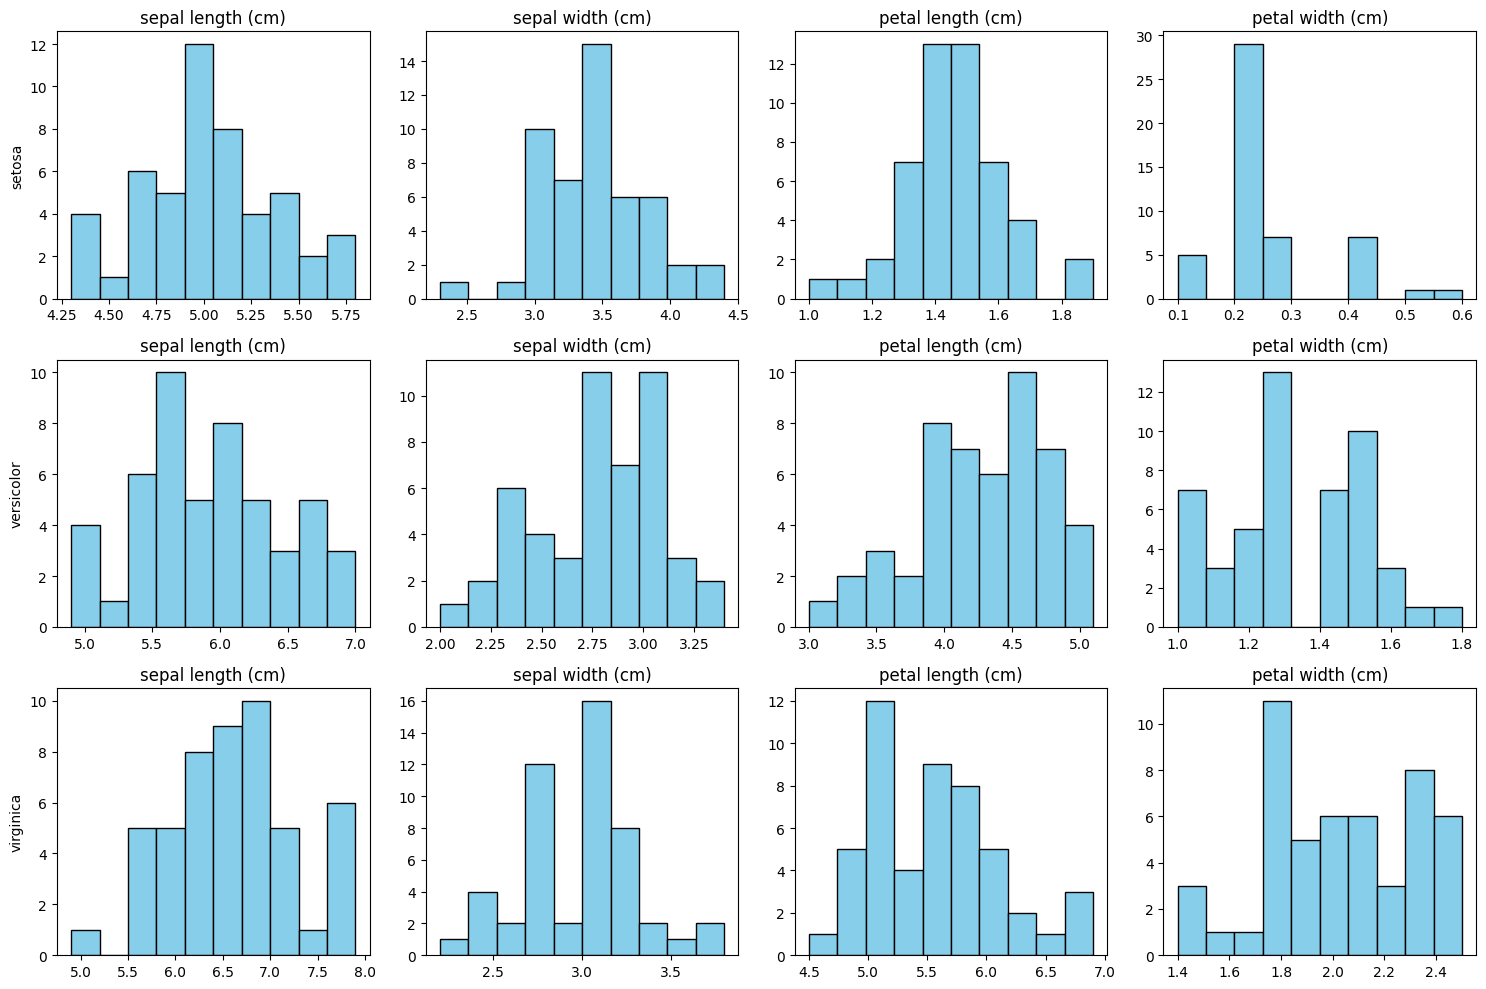

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# Load the iris dataset
iris = load_iris()
data = iris['data']
target = iris['target']
features = iris['feature_names']

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# For each species
for i, species in enumerate(np.unique(target)):
    # For each feature
    for j, feature in enumerate(range(data.shape[1])):
        # Create a histogram of the feature values for this species
        axs[i, j].hist(data[target == species, feature], bins=10, color='skyblue', edgecolor='black')
        # Set the title of the subplot to the feature name
        axs[i, j].set_title(features[j])

# Set the y-axis labels to the species names
for i, species in enumerate(iris['target_names']):
    axs[i, 0].set_ylabel(species)

plt.tight_layout()
plt.show()

Text(0.07, 0.85, 'Distribution of Aptitude Test Results from 18 – 24 year-olds')

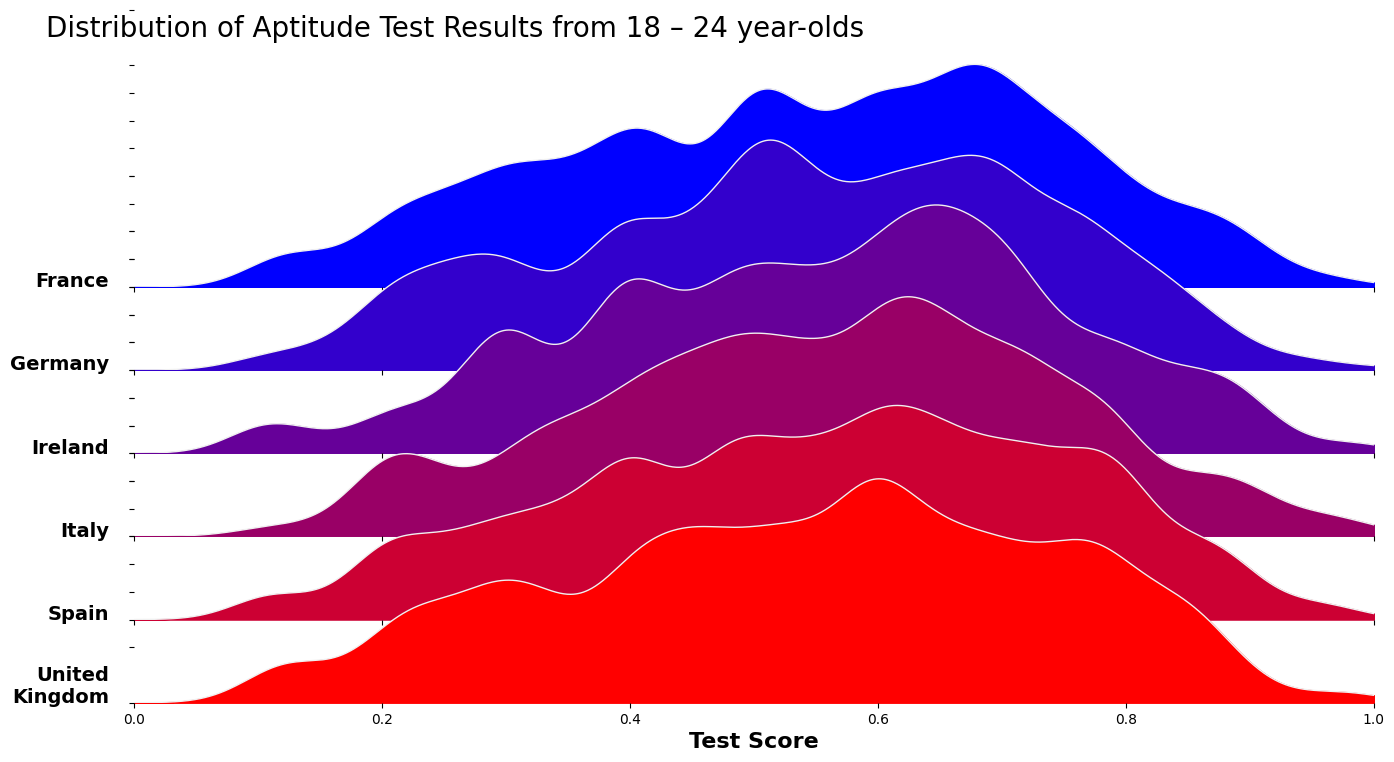

In [17]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

data = pd.read_csv("../data/mock-european-test-results.csv")

countries = [x for x in np.unique(data.country)]
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']

gs = grid_spec.GridSpec(len(countries),1)
fig = plt.figure(figsize=(16,9))

i = 0

ax_objs = []
for country in countries:
    country = countries[i]
    x = np.array(data[data.country == country].score)
    x_d = np.linspace(0,1, 1000)

    kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1,color=colors[i])


    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0,1)
    ax_objs[-1].set_ylim(0,2.5)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])

    if i == len(countries)-1:
        ax_objs[-1].set_xlabel("Test Score", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_country = country.replace(" ","\n")
    ax_objs[-1].text(-0.02,0,adj_country,fontweight="bold",fontsize=14,ha="right")

    i += 1

gs.update(hspace=-0.7)

fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 – 24 year-olds",fontsize=20)

(1850.0, 2019.0)

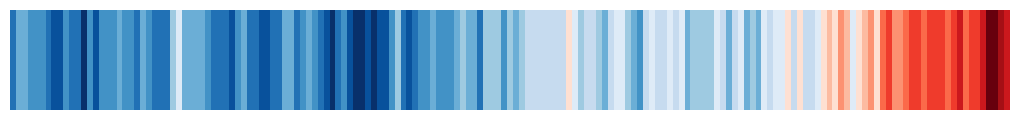

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
import pandas as pd

FIRST = 1850
LAST = 2018  # inclusive
# Reference period for the center of the color scale

FIRST_REFERENCE = 1971
LAST_REFERENCE = 2000
LIM = 0.7 # degrees

# data from

# https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.annual_ns_avg.txt

df = pd.read_fwf(
    'https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.annual_ns_avg.txt',
    index_col=0,
    usecols=(0, 1),
    names=['year', 'anomaly'],
    header=None,
)

anomaly = df.loc[FIRST:LAST, 'anomaly'].dropna()
reference = anomaly.loc[FIRST_REFERENCE:LAST_REFERENCE].mean()

# the colors in this colormap come from http://colorbrewer2.org

# the 8 more saturated colors from the 9 blues / 9 reds

cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

fig = plt.figure(figsize=(10, 1))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

# create a collection with a rectangle for each year

col = PatchCollection([
    Rectangle((y, 0), 1, 1)
    for y in range(FIRST, LAST + 1)
])

# set data, colormap and color limits

col.set_array(anomaly)
col.set_cmap(cmap)
col.set_clim(reference - LIM, reference + LIM)
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(FIRST, LAST + 1)

Text(50, -25, 'DEATHS')

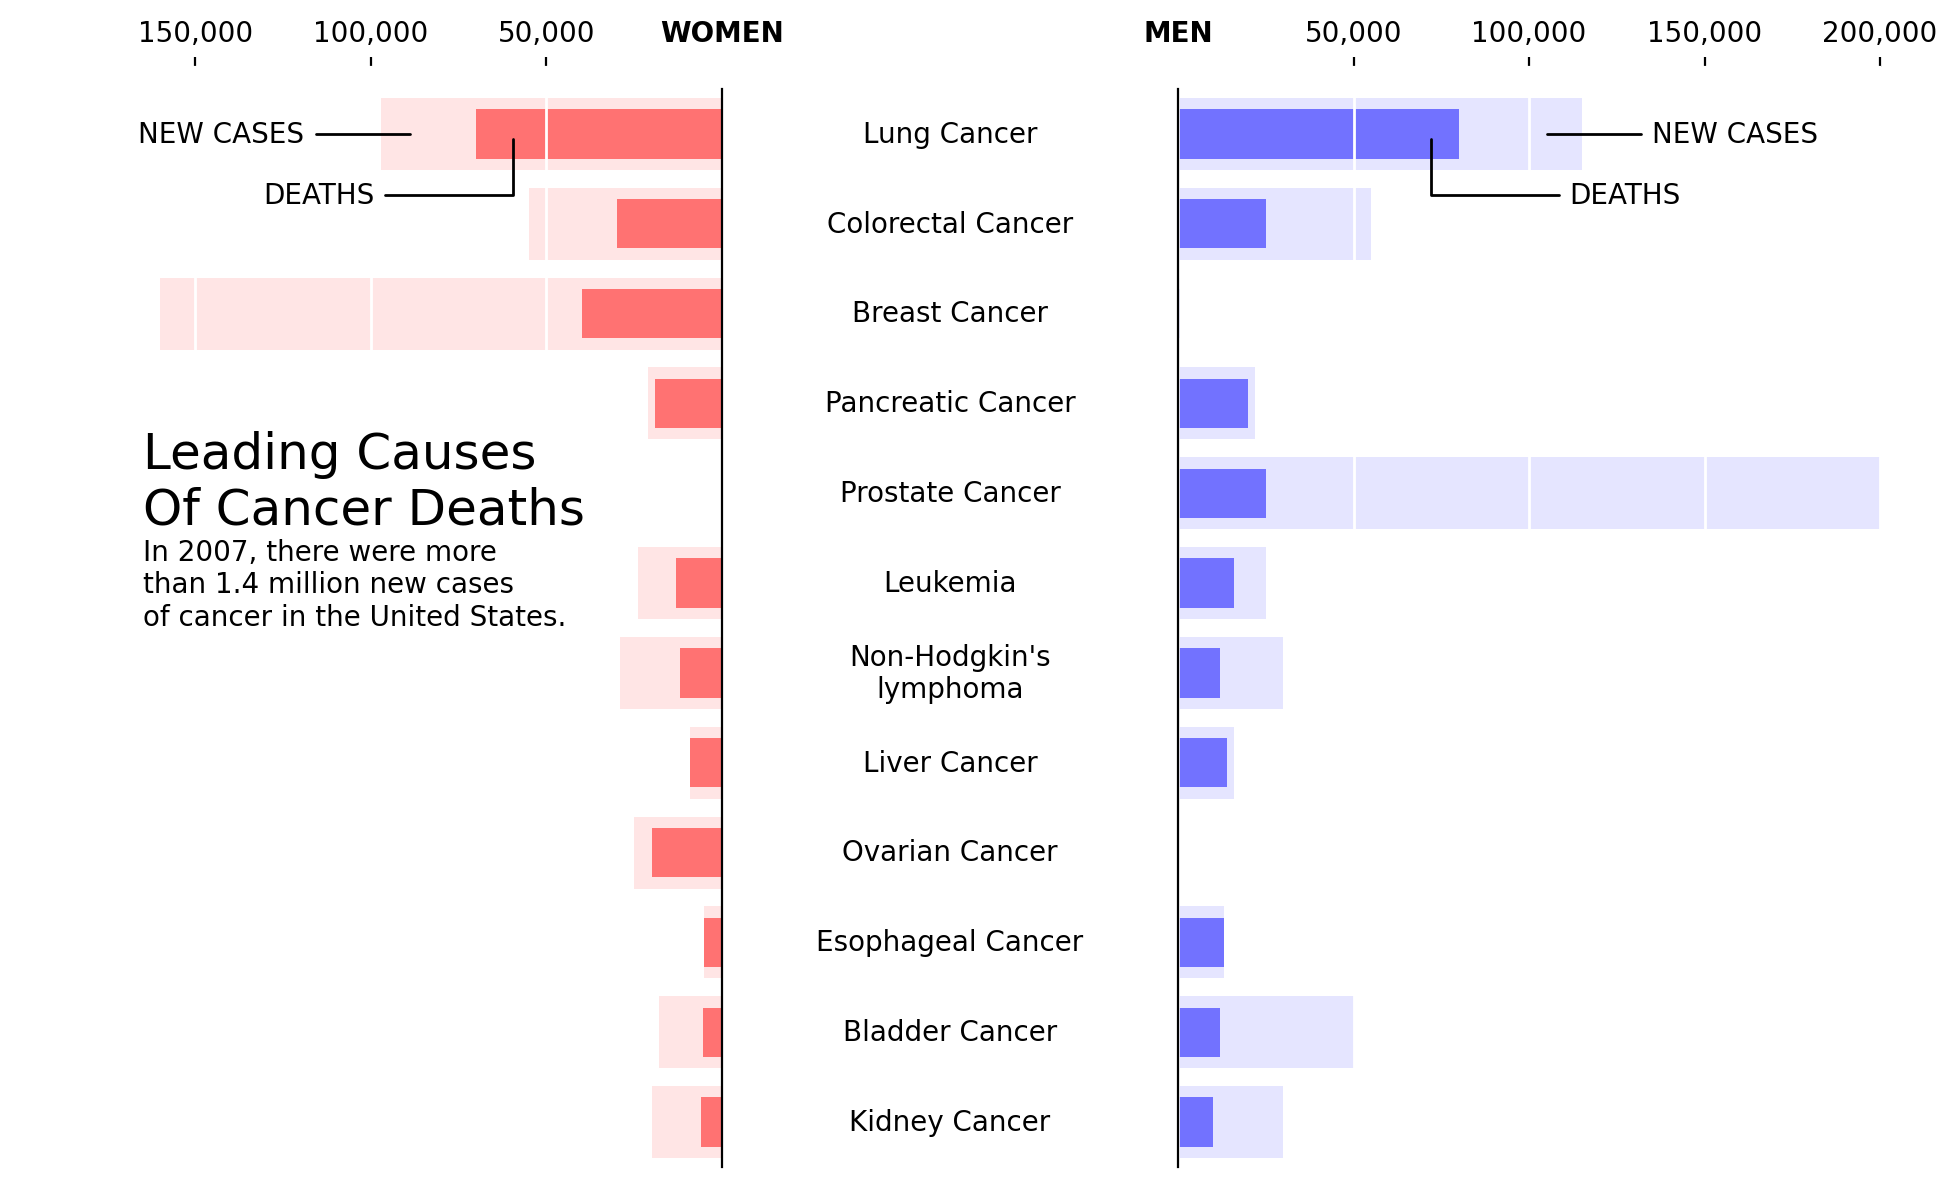

In [19]:
# -*- coding: utf-8 -*-
# -----------------------------------------------------------------------------
# Copyright (c) 2014, Matplotlib Development Team. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
#
# Author: Nicolas P. Rougier
# Source: New York Times graphics, 2007
# -> http://www.nytimes.com/imagepages/2007/07/29/health/29cancer.graph.web.html
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ----------
# Data to be represented
diseases = [
    "Kidney Cancer",
    "Bladder Cancer",
    "Esophageal Cancer",
    "Ovarian Cancer",
    "Liver Cancer",
    "Non-Hodgkin's\nlymphoma",
    "Leukemia",
    "Prostate Cancer",
    "Pancreatic Cancer",
    "Breast Cancer",
    "Colorectal Cancer",
    "Lung Cancer",
]
men_deaths = [
    10000,
    12000,
    13000,
    0,
    14000,
    12000,
    16000,
    25000,
    20000,
    500,
    25000,
    80000,
]
men_cases = [
    30000,
    50000,
    13000,
    0,
    16000,
    30000,
    25000,
    220000,
    22000,
    600,
    55000,
    115000,
]
women_deaths = [
    6000,
    5500,
    5000,
    20000,
    9000,
    12000,
    13000,
    0,
    19000,
    40000,
    30000,
    70000,
]
women_cases = [
    20000,
    18000,
    5000,
    25000,
    9000,
    29000,
    24000,
    0,
    21000,
    160000,
    55000,
    97000,
]

# ----------
# Choose some nice colors
matplotlib.rc("axes", facecolor="white")
matplotlib.rc("figure.subplot", wspace=0.65)
matplotlib.rc("grid", color="white")
matplotlib.rc("grid", linewidth=1)

# Make figure background the same colors as axes
fig = plt.figure(figsize=(12, 7), facecolor="white", dpi=200)


# ---WOMEN data ---
axes_left = plt.subplot(121)

# Keep only top and right spines
axes_left.spines["left"].set_color("none")
axes_left.spines["right"].set_zorder(10)
axes_left.spines["bottom"].set_color("none")
axes_left.xaxis.set_ticks_position("top")
axes_left.yaxis.set_ticks_position("right")
axes_left.spines["top"].set_position(("data", len(diseases) + 0.25))
axes_left.spines["top"].set_color("w")

# Set axes limits
plt.xlim(200000, 0)
plt.ylim(0, len(diseases))

# Set ticks labels
plt.xticks([150000, 100000, 50000, 0], ["150,000", "100,000", "50,000", "WOMEN"])
axes_left.get_xticklabels()[-1].set_weight("bold")
axes_left.get_xticklines()[-1].set_markeredgewidth(0)
for label in axes_left.get_xticklabels():
    label.set_fontsize(10)
plt.yticks([])


# Plot data
for i in range(len(women_deaths)):
    H, h = 0.8, 0.55
    # Death
    value = women_cases[i]
    p = patches.Rectangle(
        (0, i + (1 - H) / 2.0),
        value,
        H,
        fill=True,
        transform=axes_left.transData,
        lw=0,
        facecolor="red",
        alpha=0.1,
    )
    axes_left.add_patch(p)
    # New cases
    value = women_deaths[i]
    p = patches.Rectangle(
        (0, i + (1 - h) / 2.0),
        value,
        h,
        fill=True,
        transform=axes_left.transData,
        lw=0,
        facecolor="red",
        alpha=0.5,
    )
    axes_left.add_patch(p)

# Add a grid
axes_left.grid()

plt.text(165000, 8.2, "Leading Causes\nOf Cancer Deaths", fontsize=18, va="top")
plt.text(
    165000,
    7,
    """In 2007, there were more\n"""
    """than 1.4 million new cases\n"""
    """of cancer in the United States.""",
    va="top",
    fontsize=10,
)

# --- MEN data ---
axes_right = plt.subplot(122, sharey=axes_left)

# Keep only top and left spines
axes_right.spines["right"].set_color("none")
axes_right.spines["left"].set_zorder(10)
axes_right.spines["bottom"].set_color("none")
axes_right.xaxis.set_ticks_position("top")
axes_right.yaxis.set_ticks_position("left")
axes_right.spines["top"].set_position(("data", len(diseases) + 0.25))
axes_right.spines["top"].set_color("w")


# Set axes limits
plt.xlim(0, 200000)
plt.ylim(0, len(diseases))

# Set ticks labels
plt.xticks(
    [0, 50000, 100000, 150000, 200000],
    ["MEN", "50,000", "100,000", "150,000", "200,000"],
)
axes_right.get_xticklabels()[0].set_weight("bold")
for label in axes_right.get_xticklabels():
    label.set_fontsize(10)
axes_right.get_xticklines()[1].set_markeredgewidth(0)
plt.yticks([])

# Plot data
for i in range(len(men_deaths)):
    H, h = 0.8, 0.55
    # Death
    value = men_cases[i]
    p = patches.Rectangle(
        (0, i + (1 - H) / 2.0),
        value,
        H,
        fill=True,
        transform=axes_right.transData,
        lw=0,
        facecolor="blue",
        alpha=0.1,
    )
    axes_right.add_patch(p)
    # New cases
    value = men_deaths[i]
    p = patches.Rectangle(
        (0, i + (1 - h) / 2.0),
        value,
        h,
        fill=True,
        transform=axes_right.transData,
        lw=0,
        facecolor="blue",
        alpha=0.5,
    )
    axes_right.add_patch(p)

# Add a grid
axes_right.grid()

# Y axis labels
# We want them to be exactly in the middle of the two y spines
# and it requires some computations
for i in range(len(diseases)):
    x1, y1 = axes_left.transData.transform_point((0, i + 0.5))
    x2, y2 = axes_right.transData.transform_point((0, i + 0.5))
    x, y = fig.transFigure.inverted().transform_point(((x1 + x2) / 2, y1))
    plt.text(
        x,
        y,
        diseases[i],
        transform=fig.transFigure,
        fontsize=10,
        horizontalalignment="center",
        verticalalignment="center",
    )


# Devil hides in the details...
arrowprops = dict(arrowstyle="-", connectionstyle="angle,angleA=0,angleB=90,rad=0")
x = women_cases[-1]
axes_left.annotate(
    "NEW CASES",
    xy=(0.9 * x, 11.5),
    xycoords="data",
    horizontalalignment="right",
    fontsize=10,
    xytext=(-40, -3),
    textcoords="offset points",
    arrowprops=arrowprops,
)

x = women_deaths[-1]
axes_left.annotate(
    "DEATHS",
    xy=(0.85 * x, 11.5),
    xycoords="data",
    horizontalalignment="right",
    fontsize=10,
    xytext=(-50, -25),
    textcoords="offset points",
    arrowprops=arrowprops,
)

x = men_cases[-1]
axes_right.annotate(
    "NEW CASES",
    xy=(0.9 * x, 11.5),
    xycoords="data",
    horizontalalignment="left",
    fontsize=10,
    xytext=(+40, -3),
    textcoords="offset points",
    arrowprops=arrowprops,
)

x = men_deaths[-1]
axes_right.annotate(
    "DEATHS",
    xy=(0.9 * x, 11.5),
    xycoords="data",
    horizontalalignment="left",
    fontsize=10,
    xytext=(+50, -25),
    textcoords="offset points",
    arrowprops=arrowprops,
)